In [2]:
import pandas as pd
import plotly as py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df= pd.read_csv(r'E:\Machine learning\911.csv')

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [7]:
df['zip'].value_counts().head(5) #to find top 5 zip codes using 911

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [8]:
df['twp'].value_counts().head(5) #to find top5 cities

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [9]:
len(df['title'].unique())  #to find no of unique titles

141

In [10]:
df['title'].nunique() #samething

141

In [11]:
x = df['title'].iloc[0]

In [12]:
x.split(':')[0] #to get reason for dialing 911

'EMS'

In [13]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [14]:
df['Reason'].value_counts().head(1) #most common reason for 911

EMS    208676
Name: Reason, dtype: int64

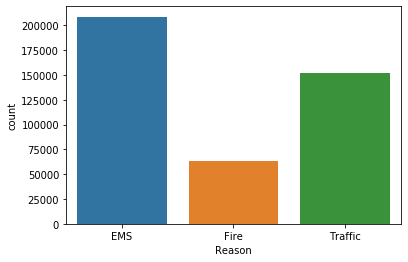

In [15]:
sns.countplot(x='Reason', data=df)

In [16]:
type(df['timeStamp'].iloc[0])

str

In [38]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])  #convert type of date from string  to datetime type

In [18]:
#type(df['timeStamp'])

In [39]:
time = df['timeStamp'].iloc[0]


In [40]:
time.hour #find the hour of 1st emergency

17

In [41]:
df['hour'] = df['timeStamp'].apply(lambda time:time.hour)

In [42]:
df['hour']

0         17
1         17
2         14
3         16
4         16
          ..
423904     8
423905     8
423906     8
423907     8
423908     8
Name: hour, Length: 423909, dtype: int64

In [43]:
df['Month'] = df['timeStamp'].apply(lambda time:time.month) #used apply to add newly created columns to df 
df['Day of week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [44]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [45]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [46]:
df['Day of week'] = df['Day of week'].map(dmap) # to convert day of week to day

In [47]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


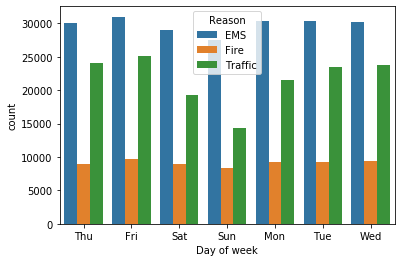

In [48]:
sns.countplot(x=df['Day of week'],hue=df['Reason'])

In [49]:
byMonth = df.groupby('Month').count()

In [50]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Day of week
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644


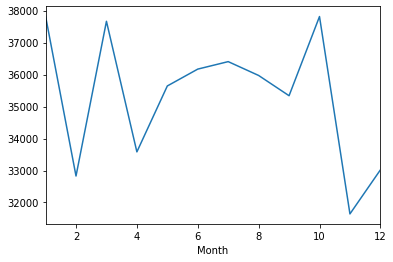

In [51]:
byMonth['lat'].plot()

In [52]:
byMonth.reset_index()   #converts index to months of the year

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Day of week
0,1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
1,2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
2,3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
3,4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
4,5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644
5,6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171
6,7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405
7,8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972
8,9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339
9,10,37815,37815,37815,32919,37815,37815,37809,37815,37815,37815,37815,37815


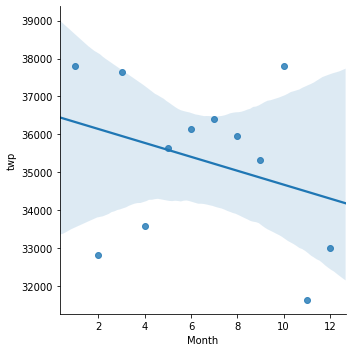

In [53]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [54]:
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
423904   2018-11-16 08:54:08
423905   2018-11-16 08:53:32
423906   2018-11-16 08:54:19
423907   2018-11-16 08:51:48
423908   2018-11-16 08:46:25
Name: timeStamp, Length: 423909, dtype: datetime64[ns]

In [68]:
t = df['timeStamp'].iloc[0]

In [69]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [70]:
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
423904    2018-11-16
423905    2018-11-16
423906    2018-11-16
423907    2018-11-16
423908    2018-11-16
Name: Date, Length: 423909, dtype: object

In [71]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


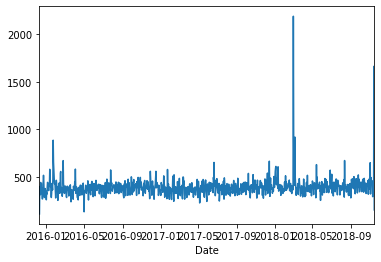

In [72]:
df.groupby('Date').count()['lat'].plot()

In [81]:
dh = df.groupby(by=['Day of week','hour']).count()['Reason'].unstack()

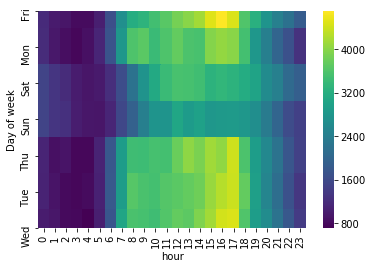

In [82]:
sns.heatmap(data=dh,cmap='viridis')

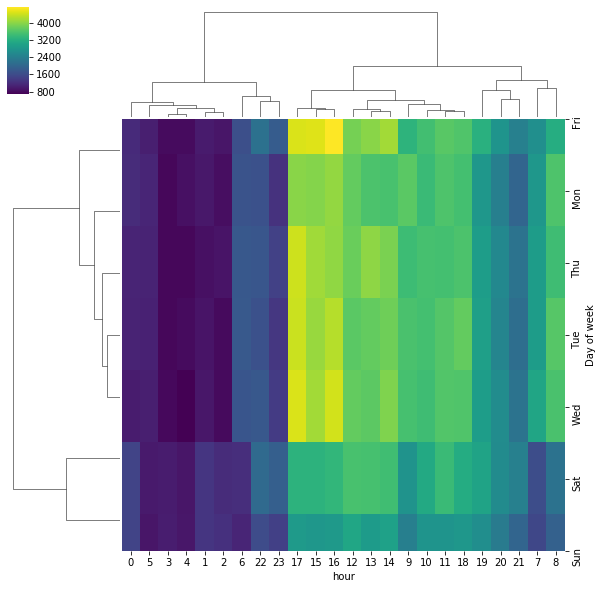

In [83]:
sns.clustermap(data=dh,cmap='viridis')

In [85]:
dm = df.groupby(by=['Day of week','Month']).count()['Reason'].unstack()

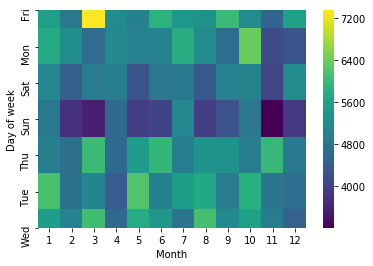

In [86]:
sns.heatmap(dm,cmap='viridis')

In [87]:
conda install pandas-datareader

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Laptop\Anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.27 |                0         124 KB
    certifi-2019.11.28         |           py37_0         154 KB
    conda-4.8.0                |           py37_1         2.8 MB
    lxml-4.4.2                 |   py37h1350720_0         1.1 MB
    openssl-1.1.1d             |       he774522_3         4.8 MB
    pandas-datareader-0.8.1    |             py_0          71 KB
    ------------------------------------------------------------
                                           Total:         9.0 MB

The following NEW packages will be INSTALLED:

  libxslt            pkgs/main/win-64::libxslt-1.1.33-h579f668_0
  lxml               pkgs/main/win-64::lxml-4.4.2-py37h13507